# Logistic Regression

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing Datasets

In [1]:
dataset = pd.read_csv('/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv')
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values
dataset.info()

NameError: name 'pd' is not defined

### Splitting the Datasets

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)
y_train
y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1])

### Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,[0,3,4,7,9,]] = sc.fit_transform(X_train[:,[0,3,4,7,9,]])
X_test[:,[0,3,4,7,9,]] = sc.transform(X_test[:,[0,3,4,7,9,]])
X_train

array([[ 0.16561372,  1.        ,  1.        , ...,  2.        ,
         0.        ,  2.        ],
       [-0.27881803,  1.        ,  1.        , ...,  2.        ,
         1.        ,  2.        ],
       [ 1.72112484,  1.        ,  0.        , ...,  0.        ,
         0.        ,  3.        ],
       ...,
       [-0.94546565,  0.        ,  1.        , ...,  2.        ,
         0.        ,  2.        ],
       [-1.50100534,  1.        ,  0.        , ...,  2.        ,
         0.        ,  3.        ],
       [ 0.49893753,  1.        ,  0.        , ...,  1.        ,
         1.        ,  3.        ]])

### Model Training

In [5]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Predicting on the Test Data

In [6]:
y_pred = classifier.predict(X_test)

### Comparing Test Data and PRedicted Data

In [7]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]]


### Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

### Displaying Confusion Matrix

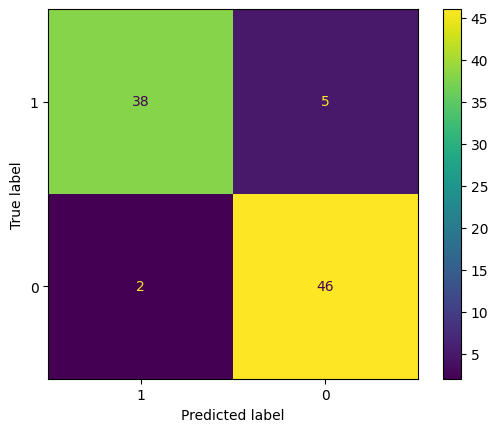

In [9]:
classes= dataset['sex'].unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

### Printing Accuracy Score and Classification Report

In [10]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("\nClassification Report: \n", classification_report(y_test,y_pred))

Accuracy:  0.9230769230769231

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.92        43
           1       0.90      0.96      0.93        48

    accuracy                           0.92        91
   macro avg       0.93      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91

